## **1. Building and Solving Linear Equations**


In [29]:
import numpy as np 
A = np.array([[2,3,1],[3,4,2],[1,1,-1]])
b = np.array([17,25,6])
print(A)
print()
print(b)

# solve the equations
x = np.linalg.solve(A,b)
print(x)
print(np.dot(A, x))

[[ 2  3  1]
 [ 3  4  2]
 [ 1  1 -1]]

[17 25  6]
[5. 2. 1.]
[17. 25.  6.]


## **2. Eigenvalues and Eienvectors**
non-hermitian and hermitian matrices.
非埃尔米特和埃尔米特矩阵

$$ Av_n = \lambda_{n}v_n $$
where $\lambda_n$ is $n^{th}$ eigenvalue, and $v_n$ is $n^{th}$ eigenvector

In [30]:
# get the eigenvalues 
import numpy as np

A = np.array([[1,5,8], [2,2,6], [2,5,9]])
print(np.linalg.eigvals(A))

[13.96427447 -1.71352338 -0.2507511 ]


In [31]:
# get the eigenvectors 
import numpy as  np

A = np.array([[1,0, 0], [0,2, 0], [0, 0,9]])

evals, evecs = np.linalg.eig(A)

print("Eigenvalues: ", evals)
print("Eigenvectors: ", evecs)


Eigenvalues:  [1. 2. 9.]
Eigenvectors:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 
The eigenvectors corresponding to the $n^{th}$ eigenvalue, stored in `evals[n]`, is the $n^{th}$ column in `evecs`, i.e., `evecs[:,n]`.

## **3. Hermitian matrices**


For hermitian matrices, we use the eigh() method

In [32]:
import numpy as np

a = np.array([[-1, 1-2j, 0],[1+2j, 0, 0-1j],[0, 1j, 1]], dtype=complex) # Hermitian matrix
evals, evecs = np.linalg.eigh(a)

print(a)
print("Eigenvalues", evals)
print("-----")
print("Eigenvectors", evecs)

[[-1.+0.j  1.-2.j  0.+0.j]
 [ 1.+2.j  0.+0.j  0.-1.j]
 [ 0.+0.j  0.+1.j  1.+0.j]]
Eigenvalues [-2.89510652  0.60270493  2.29240159]
-----
Eigenvectors [[-0.75257583+0.j         -0.45794385-0.j         -0.47319874+0.j        ]
 [ 0.28524227+0.57048455j -0.14678977-0.29357955j -0.31159205-0.62318411j]
 [ 0.14646186-0.07323093j -0.73894586+0.36947293j  0.48219076-0.24109538j]]


#### 


## **4. Matrix Operations**

In [33]:
import numpy as np

A = np.array([[2,3,1],[3,4,2],[1,1,-1]])
b = np.array([17,25,6])

Ainv = np.linalg.inv(A)
x = np.dot(Ainv, b)
print(x)

print('---')
print('Determinant of A', np.linalg.det(A))

print('\nTrace: sum of the diagonal values of a matrix')
print(np.trace(A))
print('---')
print(A)
print('\n After Transpose')
print(np.transpose(A))

[5. 2. 1.]
---
Determinant of A 2.0000000000000004

Trace: sum of the diagonal values of a matrix
5
---
[[ 2  3  1]
 [ 3  4  2]
 [ 1  1 -1]]

 After Transpose
[[ 2  3  1]
 [ 3  4  1]
 [ 1  2 -1]]


### **Euclidean norm**

$$ \|A\| = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}|a_{ij}|^2} $$

In [34]:
v = np.array([0, 3, 4])
M = np.array([[2, 3, 5], [4, 98, 2], [11, 12, -13]])

print("Norm of v is", np.linalg.norm(v))
print("Norm of M is", np.linalg.norm(M))

Norm of v is 5.0
Norm of M is 100.47885349664377


## **5. Sparse matrices**

In a sparse matrix, only the value and location of non-zero values in a matrix are stored. Functionality for sparse matrices is available in the scipy submodule sparse

在稀疏矩阵中，仅存储矩阵中非零值的值和位置。稀疏矩阵的功能在scipy子模块sparse中可用

There are two commonly used ways to create a sparse matrix:
1.    compressed sparse column using the `csc_matrix(A)` method.
2.    compressed sparse row using the `csr_matrix(A)` method.


In [35]:
import scipy.sparse as sp
import numpy as np

M = np.array([[2, 3, 0, 0], [1, 2, 3, 0], [0, 1, 2, 3], [0, 0, 1, 2]])
print(M)

sparse_column = sp.csc_matrix(M) 
print("\nCompressed Sparse Column")
print(sparse_column)

sparse_row = sp.csr_matrix(M) 
print("\nCompressed Sparse Row")
print(sparse_row)

print("\nDense Matrix")
print(sparse_row.todense())

[[2 3 0 0]
 [1 2 3 0]
 [0 1 2 3]
 [0 0 1 2]]

Compressed Sparse Column
  (0, 0)	2
  (1, 0)	1
  (0, 1)	3
  (1, 1)	2
  (2, 1)	1
  (1, 2)	3
  (2, 2)	2
  (3, 2)	1
  (2, 3)	3
  (3, 3)	2

Compressed Sparse Row
  (0, 0)	2
  (0, 1)	3
  (1, 0)	1
  (1, 1)	2
  (1, 2)	3
  (2, 1)	1
  (2, 2)	2
  (2, 3)	3
  (3, 2)	1
  (3, 3)	2

Dense Matrix
[[2 3 0 0]
 [1 2 3 0]
 [0 1 2 3]
 [0 0 1 2]]


###  **Solving equations with Sparse matrices**

In [36]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve 

M = np.array([[2, 3, 1], [3, 4, 2], [1, 1, -1]])
print(M)
A = sp.csc_matrix(M)    # conversion to sparse matrix
print('\nA:')
print(A)

b = np.array([17, 25, 6])
print('\nb:')
print(b)

x = spsolve(A, b)       # solving the system of linear equation

print('\nThe solution of the linear equation:')
print(x)

print('\nChecking the solution b= A*x, b = ')
print(A*x)

[[ 2  3  1]
 [ 3  4  2]
 [ 1  1 -1]]

A:
  (0, 0)	2
  (1, 0)	3
  (2, 0)	1
  (0, 1)	3
  (1, 1)	4
  (2, 1)	1
  (0, 2)	1
  (1, 2)	2
  (2, 2)	-1

b:
[17 25  6]

The solution of the linear equation:
[5. 2. 1.]

Checking the solution b= A*x, b = 
[17. 25.  6.]


## **6.Task**
In this exercise, you will fit a wave by finding the unknown parameters of the equation 
$$ y = asin(\pi{t}) + bsin(2\pi{t}) + csin(3\pi{t}) + dsin(4\pi{t})$$

$(t_0,y_0)=(0.25,3)$

$(t_1,y_1)=(0.5,2)$

$(t_2,y_2)=(0.75,-3)$

$(t_3,y_3)=(1,0)$

a, b, c, d:  [ 1.  3. -1. -2.]


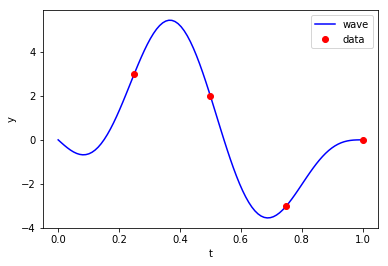

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# setting up the equation
tp = np.array([0.25, 0.5, 0.75, 1])
yp = np.array([3, 2, -3, 0])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.sin(1 * np.pi * tp[i]), np.sin(2 * np.pi * tp[i]), \
    np.sin(3 * np.pi * tp[i]), np.sin(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]

# Solving the equation
sol = np.linalg.solve(A, rhs)
print('a, b, c, d: ', sol)

# plotting the wave
t = np.linspace(0, 1, 100)
y = sol[0] * np.sin(1 * np.pi * t) + sol[1] * np.sin(2 * np.pi * t) + sol[2] * np.sin(3 * np.pi * t) + sol[3] * np.sin(4 * np.pi * t)

plt.plot(t, y, 'b', label='wave')
plt.xlabel('t')
plt.ylabel('y')

# plotting the initial points
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');
plt.show()
